**INTRODUCTION**

In the vast world of online platforms, YouTube stands out as one of the most popular video-sharing sites, attracting millions of users from around the globe. While YouTube fosters a thriving community of genuine interactions and meaningful discussions, it also faces challenges with the presence of spam comments. These spam comments, often created by malicious users or automated bots, can be disruptive and harm the overall user experience.

To address this issue, the focus of this project is on YouTube comments spam detection, where the goal is to automatically identify and distinguish between legitimate comments and spammy content. By leveraging machine learning algorithms and analyzing the vast amount of data available on YouTube comments, we aim to build an effective and accurate spam detection system.

The challenge in YouTube comments spam detection lies in the diversity of spam tactics employed by malicious actors. Traditional keyword-based filters are no longer sufficient, as spammers continuously adapt and use sophisticated techniques to evade detection. Therefore, we will explore advanced natural language processing (NLP) techniques, such as TF-IDF (Term Frequency-Inverse Document Frequency) and machine learning models like Support Vector Machines (SVM) or Logistic Regression, to extract relevant features from the comment text and classify them as spam or non-spam.

By detecting and filtering out spam comments, we can significantly improve the quality of user interactions on YouTube, enhance the platform's credibility, and create a more engaging and enjoyable experience for all users. Through this project, we embark on the journey of developing an intelligent solution to tackle YouTube comments spam, contributing to a safer and more vibrant online community.

**TASK DESCRIPTION**

In this data analysis project, we will be working with a dataset containing comments from YouTube videos. The objective of this project is to develop a machine learning model that can effectively detect and classify spam comments on YouTube. By achieving this goal, we aim to improve the overall user experience, maintain a healthy online community, and enhance content quality on the platform.

The main tasks for this project are as follows:

1) Data Collection: We will start by gathering the YouTube comments dataset, which will serve as the foundation for our analysis. The dataset will include both spam and non-spam (legitimate) comments.

2) Data Preprocessing: Before applying machine learning algorithms, we need to preprocess the data. This step involves tasks such as text cleaning, removing special characters, converting text to lowercase, and tokenization.

3) Feature Engineering: To build an effective spam detection model, we will need to engineer relevant features from the text data. Techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) will be employed to represent the comments as numerical features.

4) Machine Learning Model: Using Python and libraries like Scikit-learn, we will train a machine learning model on the preprocessed dataset. Various algorithms, such as Naive Bayes, Support Vector Machines (SVM), or Logistic Regression, will be explored to find the best-performing model.

5) Model Evaluation: The performance of the spam detection model will be evaluated using appropriate metrics such as accuracy, precision, recall, F1 score, and area under the Receiver Operating Characteristic (ROC) curve. This step is crucial to ensure the model's effectiveness in identifying spam comments.

6) Key Features Identification: Additionally, we will analyze the most significant features that contribute to the identification of spam comments. This analysis will provide insights into the characteristics that differentiate spam from legitimate comments.

7) Visualization and Interpretation: Throughout the project, we will use data visualization techniques to gain a better understanding of the data and model results. Interpretation of the findings will be essential to communicate the outcomes effectively.

By successfully completing this project, we aim to deliver a robust and reliable spam detection model for YouTube comments. This model can be implemented by YouTube administrators to automatically filter and remove spam comments, thus fostering a positive user experience and ensuring the integrity of the YouTube platform.

**Data Source:**

The dataset employed for this project is obtained from Kaggle. This collection contains comments from a selection of YouTube videos that have garnered notably high views. Each record in the dataset provides information about the author, the date of the comment, its content, and a classification - labeled either as '0' (non-spam) or '1' (spam).

[View the dataset on Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/images)

**Acknowledgements:**

A heartfelt appreciation to Mr. Lakshmipathi for his efforts in compiling and curating this comprehensive dataset. Additionally, we extend our appreciation to the Kaggle community for providing a platform that facilitates academic and practical advancements in the field.

**Tools and Frameworks**

To initiate the exploratory analysis, import required libraries



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC,SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

**Exploring Input data files**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


**Creating a unified CSV Dataset**


The code snippet specifies an input directory (input_directory) containing certain CSV files related to YouTube comments from different artists' channels. It then iterates through the 'file' names listed in 'file_list', using pandas to read each CSV file and appending the resulting DataFrame to the 'data_frame' list. 

Once all files are read, the DataFrames are merged into one single DataFrame, merged_data, using the pd.concat function with the ignore_index=True argument to reset the index. Finally, merged_data.info() is called to provide a concise summary of this merged DataFrame, detailing the number of non-null entries and the data type for each column.

In [4]:
# Set the directory where your CSV files are located (update the path)
input_directory = '/Users/osazeogbebor/Desktop/youtube-spam-collection-v1/'

# List of CSV files
file_list = ['Youtube01-Psy.csv', 'Youtube02-KatyPerry.csv', 'Youtube03-LMFAO.csv', 'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv']

# Initialize an empty list to store each DataFrame
data_frame = []

# Loop through each file, read it into a DataFrame, and append to the list
for x in file_list:
    file_path = os.path.join(input_directory, x)
    data = pd.read_csv(file_path)
    data_frame.append(data)

# Concatenate all DataFrames into one
merged_data = pd.concat(data_frame, ignore_index=True)

# Display summary of merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


**Data Exploration and Analysis**

In [7]:
# Data overview

merged_data.info() #summarizes data structure and types. 
merged_data.describe() # provides statistical summary of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


,CLASS
count,1956.000000
mean,0.513804
std,0.499937
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
merged_data.head() # Displays first five (5) rows

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [9]:
mapping = {0: 'No spam',1:'spam'} 
merged_data['CLASS'] = merged_data['CLASS'].replace(mapping) #transform numerical labels into more human-readable form

In [10]:
merged_data['CLASS'].value_counts() #displays distribution of unique values on the target variable

spam       1005
No spam     951
Name: CLASS, dtype: int64

In [11]:
merged_data = merged_data[['CONTENT','CLASS']] # This replaces inital dataframe with only two columns. They are not relevant to the analysis.

**Model training and Evaluation**

In [12]:
X = merged_data['CONTENT'] #Input Variable
y = merged_data['CLASS'] #Target Variable

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
text_vectorizer = TfidfVectorizer(stop_words= 'english') # This converts raw text into numerical matrix

X_train = text_vectorizer.fit_transform(X_train) #fit and transform the input training variable
X_test = text_vectorizer.transform(X_test) #transform input test variable

In [17]:
def learning_models(model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    print(classification_report(y_test,preds))
    
    cm = confusion_matrix(y_test,preds)
    smd = ConfusionMatrixDisplay(cm)
    smd.plot()
    
    

In [18]:
def auc_roc_plot(y_test,preds):
    
    plt.figure(figsize = (6,6))
    mapping = {'No spam': 0,'spam':1}
    y_test_replace = y_test.replace(mapping)
    
    fpr,tpr,treshold  = roc_curve(y_test_replace,preds)
    auc_roc_curve = auc(fpr,tpr) 
    plt.plot(fpr,tpr,label = 'auc_roc %0.3f'%(auc_roc_curve))
    plt.plot([0,1],[0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend()

**Model training and evaluation : Logisitic regression**

              precision    recall  f1-score   support

     No spam       0.91      0.96      0.94       275
        spam       0.97      0.92      0.94       312

    accuracy                           0.94       587
   macro avg       0.94      0.94      0.94       587
weighted avg       0.94      0.94      0.94       587

roc_auc_score : 0.981


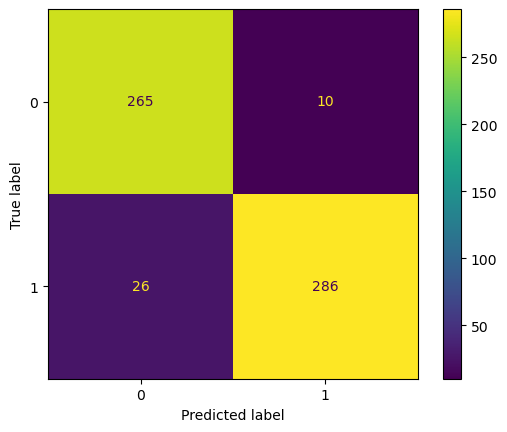

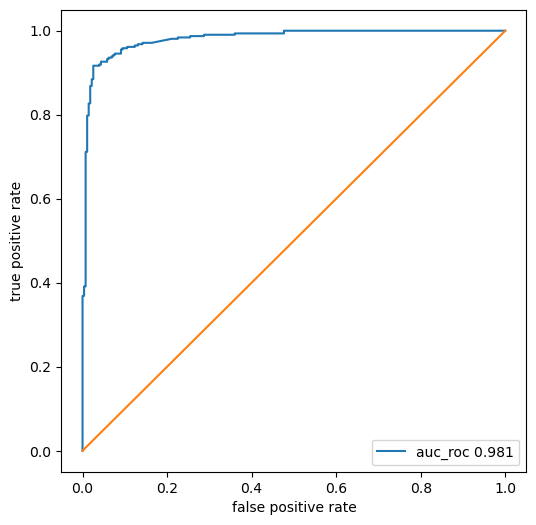

In [19]:
#Now we use Gridsearch to find the best parameter for the  Logistic regression model.

model = LogisticRegression()

param_grid = {'tol': [0.001,0.01,0.1,1],
             'C':[0.1,1,10,100],
             }

Log_reg_grid= GridSearchCV(model,param_grid,cv = 5)
learning_models(Log_reg_grid)

best_params = Log_reg_grid.best_estimator_
preds2 = best_params.predict_proba(X_test)[:,1]
auc_roc_plot(y_test,preds2)

lr_roc_auc_scores  = roc_auc_score(y_test,preds2)
print('roc_auc_score : %0.3f'%(lr_roc_auc_scores) )

**Model training and evaluation : Support Vector Classifier(SVC)**

              precision    recall  f1-score   support

     No spam       0.84      0.98      0.90       275
        spam       0.98      0.83      0.90       312

    accuracy                           0.90       587
   macro avg       0.91      0.90      0.90       587
weighted avg       0.91      0.90      0.90       587

roc_auc_score : 0.969


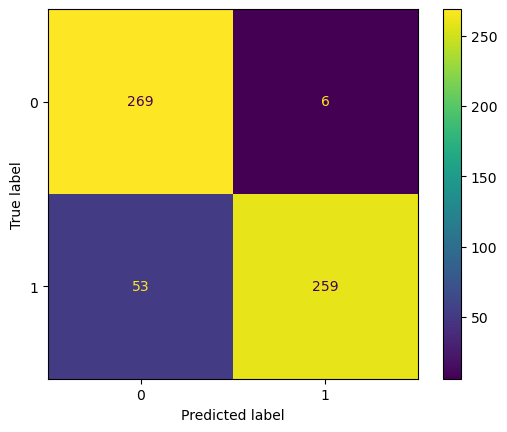

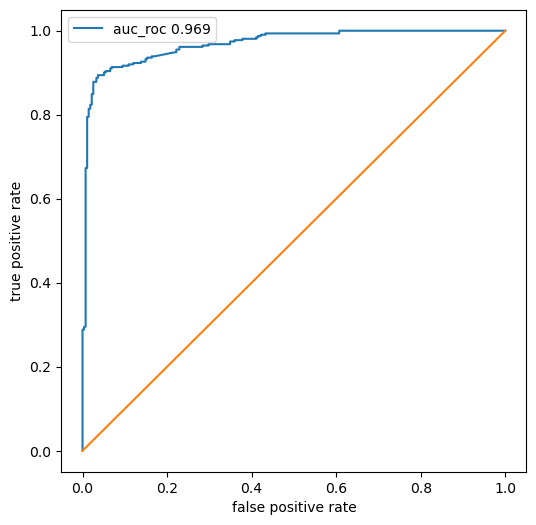

In [20]:
model = SVC(probability=True)

param_grid = {'C':[0.001,0.01,0.1],
             'kernel': ['linear','poly','rbf'],
             'degree':[1,2,3,4],
             'tol':[0.001,0.01,0.1]}

Grid = GridSearchCV(model,param_grid,cv = 5)
learning_models(Grid)


best_params = Grid.best_estimator_
preds2 = best_params.predict_proba(X_test)[:,1]
auc_roc_plot(y_test,preds2)

svc_roc_auc_scores  = roc_auc_score(y_test,preds2)
print('roc_auc_score : %0.3f'%(svc_roc_auc_scores) )


**Model training and Evaluation: KNN**

/Users/osazeogbebor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/osazeogbebor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

              precision    recall  f1-score   support

     No spam       0.62      0.96      0.75       275
        spam       0.93      0.48      0.63       312

    accuracy                           0.70       587
   macro avg       0.77      0.72      0.69       587
weighted avg       0.78      0.70      0.69       587

roc_auc_score: 0.765


/Users/osazeogbebor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/osazeogbebor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

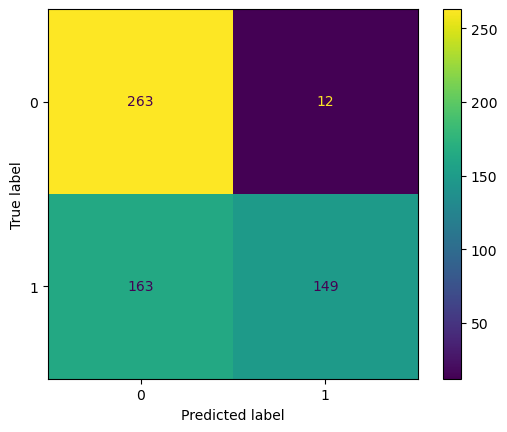

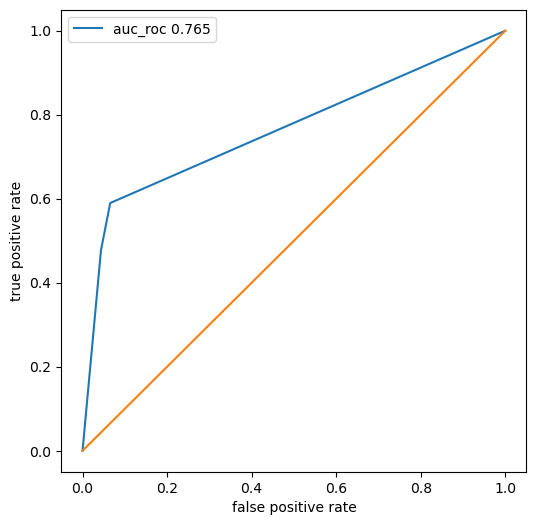

In [21]:
model = KNeighborsClassifier()
param_grid =  {'n_neighbors':[2,4,6,8,10]
              }

Grid = GridSearchCV(model,param_grid,cv = 5)
learning_models(Grid)


best_param = Grid.best_estimator_
predict = best_param.predict_proba(X_test)[:,1]

auc_roc_plot(y_test,predict)

knn_scores = roc_auc_score(y_test,predict)
print('roc_auc_score: %0.3f' %(knn_scores))

**Model training and Evaluation: Random forest Classifier**

              precision    recall  f1-score   support

     No spam       0.90      0.95      0.92       275
        spam       0.95      0.91      0.93       312

    accuracy                           0.93       587
   macro avg       0.93      0.93      0.93       587
weighted avg       0.93      0.93      0.93       587

auc_roc :0.973


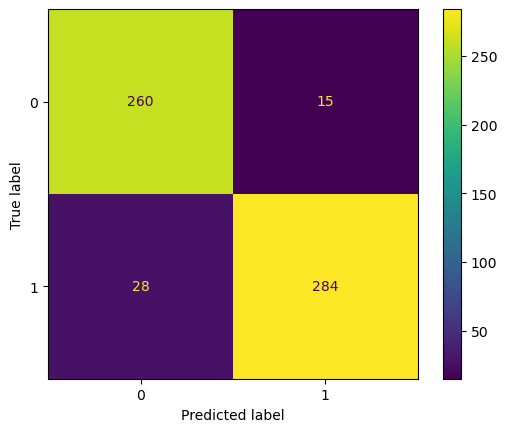

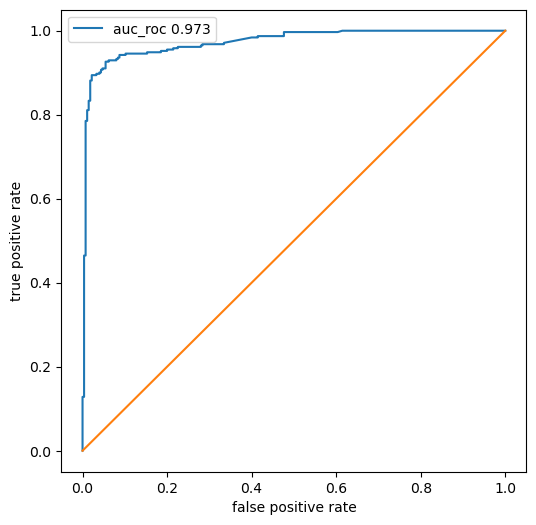

In [22]:
model = RandomForestClassifier(oob_score = True)

param_grid = {'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[2,4,6,8,10],
              'n_estimators':[100,200,300]
             }

Grid = GridSearchCV(model,param_grid,cv = 5)
learning_models(Grid)

predict = Grid.predict_proba(X_test)[:,1]
auc_roc_plot(y_test,predict)
rf_auc_roc = roc_auc_score(y_test,predict)

print('auc_roc :%0.3f' %(rf_auc_roc))

**Model training and Evaluation: Decision Tree Classifier**

              precision    recall  f1-score   support

     No spam       0.87      0.96      0.92       275
        spam       0.96      0.88      0.92       312

    accuracy                           0.92       587
   macro avg       0.92      0.92      0.92       587
weighted avg       0.92      0.92      0.92       587

roc_auc_score : 0.918


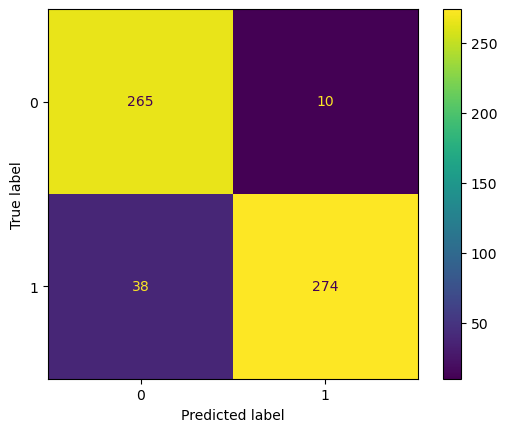

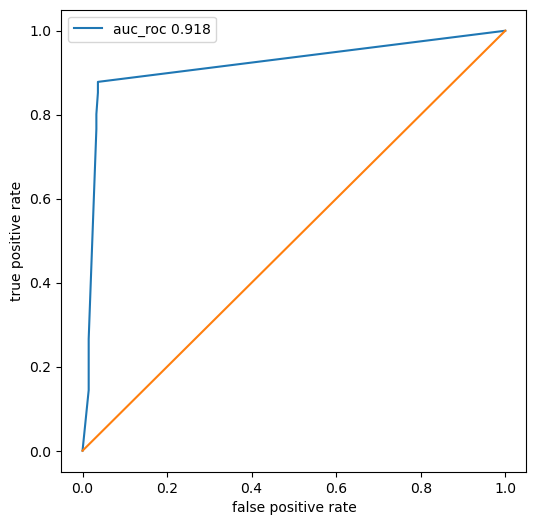

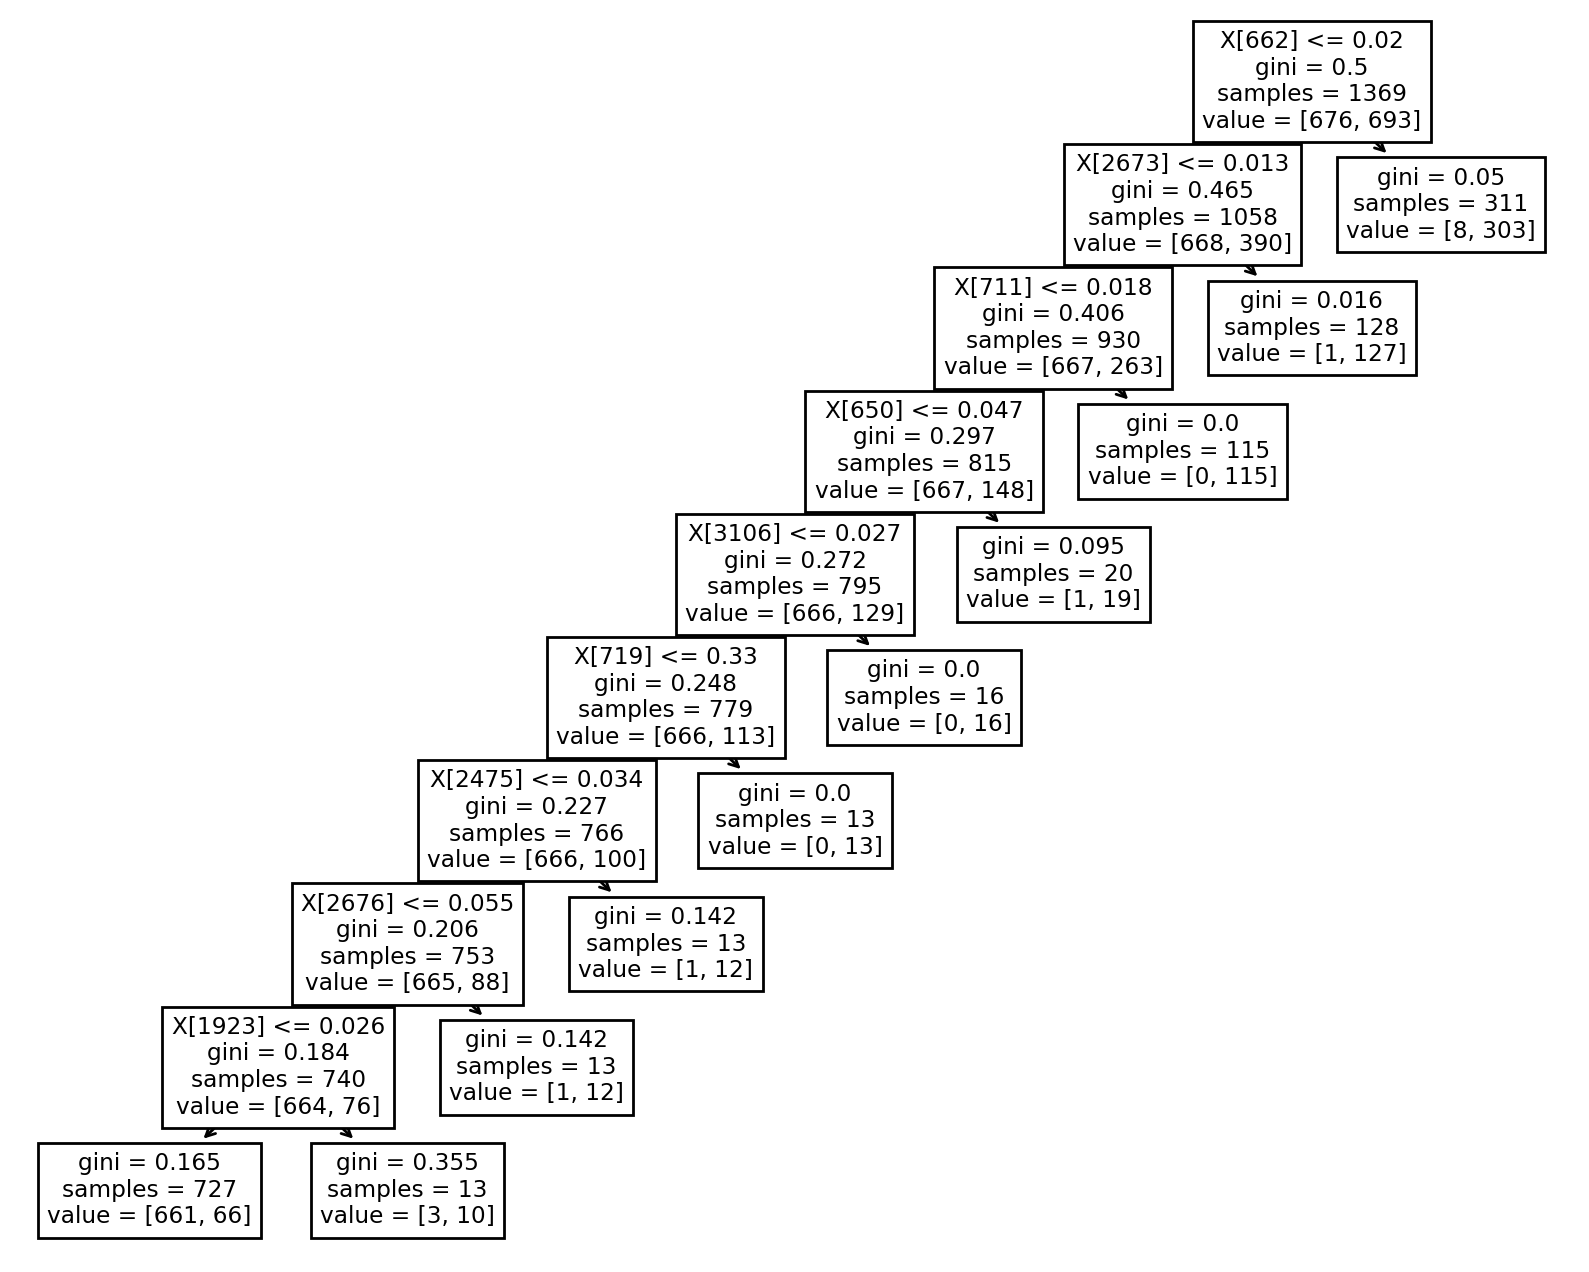

In [23]:
model = DecisionTreeClassifier(max_leaf_nodes=10)
model.fit(X_train,y_train)
param_grid = {'min_samples_split': [2,4,6,8],
             'min_samples_leaf':[2,3,5,7]}

grid = GridSearchCV(model,param_grid,cv = 5)
learning_models(grid)

best_param = grid.best_estimator_
predict = best_param.predict_proba(X_test)[:,1]


dt_roc_auc = roc_auc_score(y_test,predict)
print('roc_auc_score : %0.3f' %(dt_roc_auc))
auc_roc_plot(y_test,predict)



plt.figure(figsize = (10,8),dpi = 200)
plot_tree(model);
plt.show()





**Model training and Evaluation: Naive Bayes-MultinomialNB**

              precision    recall  f1-score   support

     No spam       0.91      0.84      0.88       275
        spam       0.87      0.93      0.90       312

    accuracy                           0.89       587
   macro avg       0.89      0.88      0.89       587
weighted avg       0.89      0.89      0.89       587

roc_auc_score_dt: 0.970


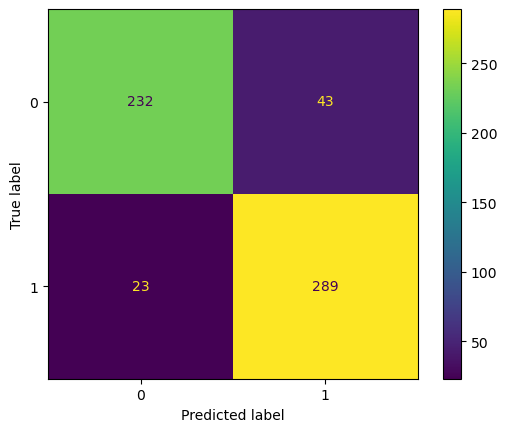

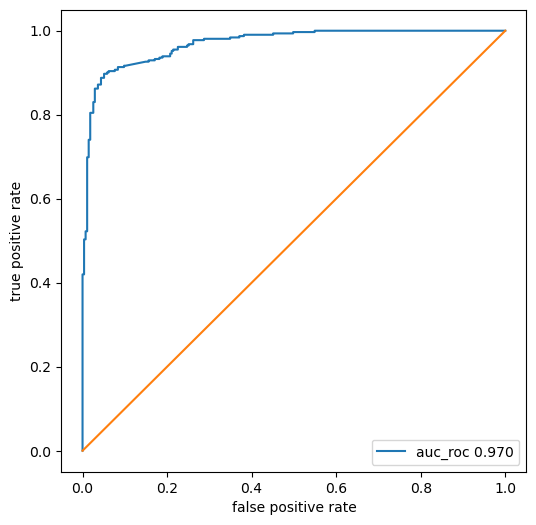

In [24]:
model = MultinomialNB()

param_grid = {'alpha':[1,3,5,7]}
Grid = GridSearchCV(model,param_grid, cv = 5)
learning_models(Grid)

param = Grid.best_estimator_
predict = param.predict_proba(X_test)[:,1]
auc_roc_plot(y_test,predict)


multiNB_roc_score = roc_auc_score(y_test,predict)
print ('roc_auc_score_dt: %0.3f' %(multiNB_roc_score))

**Model training and Evaluation: Naive Bayes-BernolliNB**

              precision    recall  f1-score   support

     No spam       0.80      0.98      0.88       275
        spam       0.98      0.78      0.87       312

    accuracy                           0.87       587
   macro avg       0.89      0.88      0.87       587
weighted avg       0.89      0.87      0.87       587

roc_auc_score : 0.970 


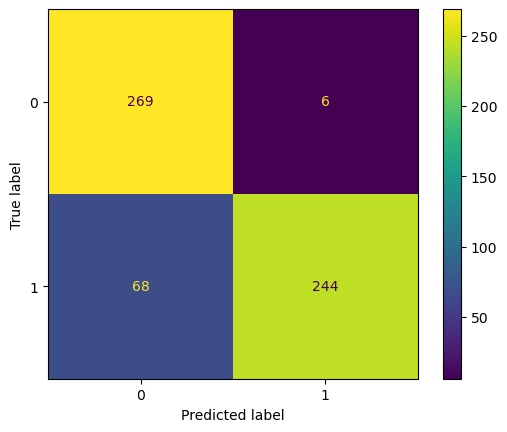

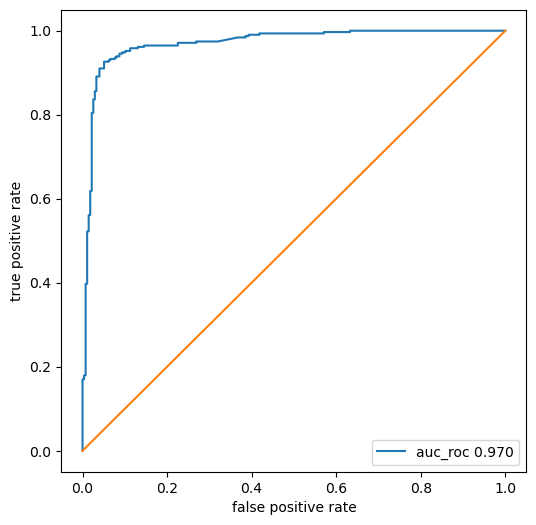

In [25]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

param_grid = {'alpha':[1,5,10,15]}

Grid = GridSearchCV(model,param_grid,cv = 5)
learning_models(Grid)

best_param = Grid.best_estimator_
predict = best_param.predict_proba(X_test)[:,1]
auc_roc_plot(y_test,predict)

bern_roc_auc = roc_auc_score(y_test,predict)
print ('roc_auc_score : %0.3f ' %(bern_roc_auc))

In [26]:
summary = {'MODELS':['logistic regression', 'Support Vector Classifier', 'Decision Tree', 
               'K nearest neighbor', 'Random_forest', 'Multinomial NB', 'Bernouli NB'],
           'AUC_ROC':[lr_roc_auc_scores, svc_roc_auc_scores, dt_roc_auc, 
                knn_scores, rf_auc_roc, multiNB_roc_score, bern_roc_auc]
          }

In [27]:
result = pd.DataFrame(data = summary, columns=['MODELS','AUC_ROC'])
result.set_index('MODELS',inplace = True)
result.sort_values(by = 'AUC_ROC',ascending= False)

,AUC_ROC
MODELS,
logistic regression,0.981369
Random_forest,0.972955
Bernouli NB,0.970227
Multinomial NB,0.969633
Support Vector Classifier,0.968502
Decision Tree,0.918392
K nearest neighbor,0.764907


In [28]:
#Evaluating the model with a sample input
comment = ['hello, how are you','please join my investment channel']
transform = text_vectorizer.transform(comment)


model =  Log_reg_grid.best_estimator_ 
model.predict(transform)

#The following results demonstrate the model's efficacy in identifying spam.

array(['No spam', 'spam'], dtype=object)